## Data Discovery

Data discovery of the energy forecast.

In [8]:
from google.datalab import bigquery as bq
import pandas as pd

In [7]:
query = """
select 
  sl.point,
  sl.latitude,
  sl.longitude,
  f.prediction_date,
  f.wind_speed_100m,
  f.wind_direction_100m,
  f.temperature,
  f.air_density,
  f.pressure,
  f.precipitation,
  f.wind_gust,
  f.radiation,
  f.wind_speed,
  f.wind_direction
from
  `energy.historical_forecasting` as f
JOIN
  `energy.station_location` as sl
ON
  f.point = sl.point
"""

df = bq.Query(query).execute().result().to_dataframe()
df.describe()

,point,wind_speed_100m,wind_direction_100m,temperature,air_density,pressure,precipitation,wind_gust,radiation,wind_speed,wind_direction
count,272592.000000,272592.000000,272592.000000,272592.000000,272592.000000,272592.000000,272592.000000,272592.000000,272592.000000,272592.000000,272592.000000
mean,9.500000,4.637073,194.652307,14.483588,1.135904,936.946597,0.124406,4.893374,216.905158,3.146508,193.737157
std,5.188137,2.916167,102.063648,10.434206,0.057938,47.494264,0.278393,3.639607,276.894263,1.980469,101.226174
min,1.000000,0.000000,0.000000,-24.700000,0.960000,825.300000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,5.000000,2.500000,109.700000,6.900000,1.090000,891.000000,0.000000,2.300000,0.000000,1.700000,111.575000
50%,9.500000,4.000000,209.800000,13.400000,1.130000,934.500000,0.000000,3.700000,65.400000,2.700000,207.100000
75%,14.000000,6.100000,277.800000,20.600000,1.180000,982.700000,0.100000,6.400000,398.600000,4.100000,275.600000
max,18.000000,29.100000,360.000000,57.600000,1.300000,1036.700000,2.100000,30.400000,1019.900000,21.500000,360.000000


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


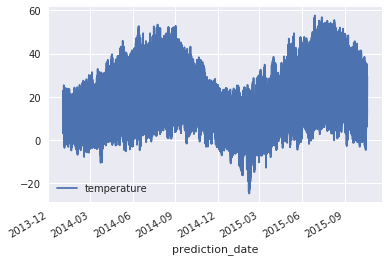

In [15]:
df.plot(x='prediction_date', y='temperature')

In [13]:
df.dtypes

point                           int64
latitude                       object
longitude                      object
prediction_date        datetime64[ns]
wind_speed_100m               float64
wind_direction_100m           float64
temperature                   float64
air_density                   float64
pressure                      float64
precipitation                 float64
wind_gust                     float64
radiation                     float64
wind_speed                    float64
wind_direction                float64
dtype: object